In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = 15, 8

path = "/home/daniel/Data/arrays_512cf/X_CMN.txt"
X = np.loadtxt(path)
print(X.shape)
# separando datos en datos de entrenamiento y datos de testeo (0.25)
X_train, X_test, y_train, y_test = train_test_split(X[:,:-1],X[:,-1])

(35264, 66)


In [36]:
clf1 = RandomForestClassifier()
clf2 = DecisionTreeClassifier()
clf3 = XGBClassifier()
clf4 = SVC()
clf5 = LogisticRegression()
clf6 = AdaBoostClassifier()
clf7 = KNeighborsClassifier()
clf8 = MLPClassifier()

classifiers = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8]

## RandomForest

### n_estimators = 80

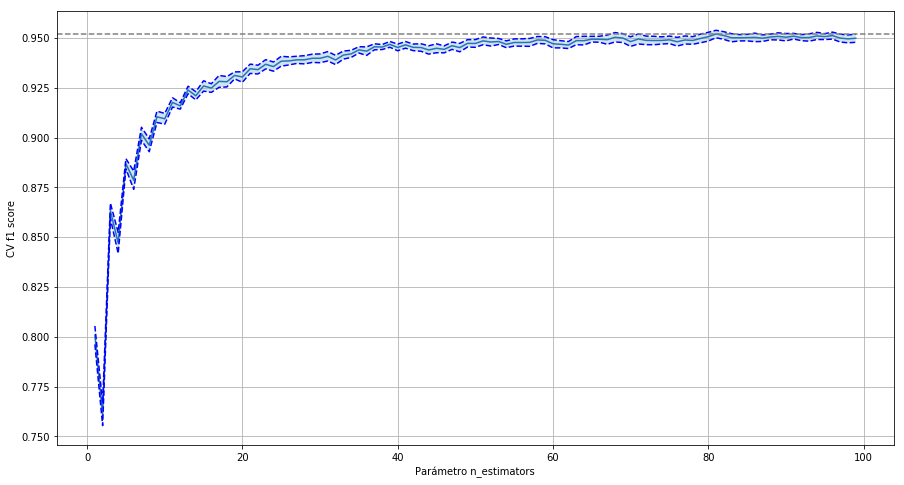

In [37]:
parameter = "n_estimators"
alphas = range(1,100)
tuned_parameters = [{parameter: alphas}]
n_folds = 5

clf = GridSearchCV(clf1, tuned_parameters, cv=n_folds, refit=False, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.plot(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.plot(alphas, scores + std_error, 'b--')
plt.plot(alphas, scores - std_error, 'b--')
std_error = scores_std / np.sqrt(n_folds)
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV f1 score')
plt.xlabel('Parámetro %s'%parameter)
plt.grid()
#plt.ylim(0, 1.1)
plt.show()

### max_features = "sqrt"

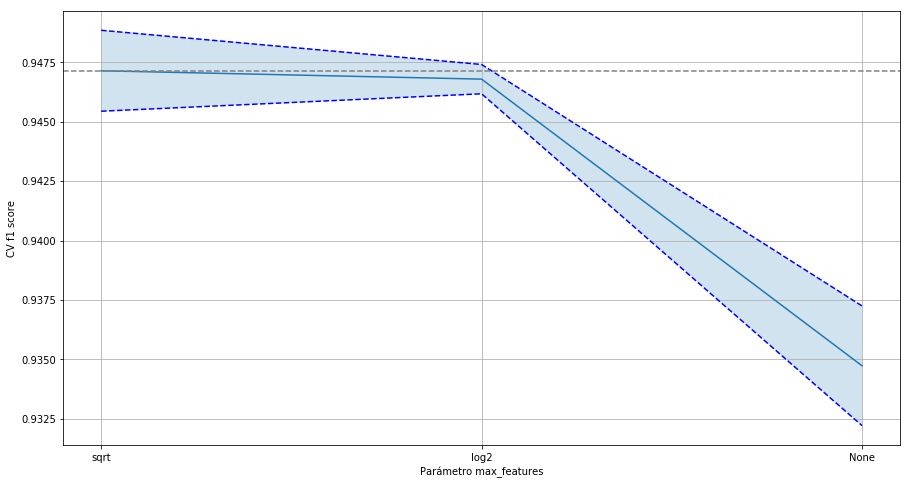

In [38]:
parameter = "max_features"
alphas = ["sqrt", "log2", None]
alphas2 = ["sqrt", "log2", "None"]
tuned_parameters = [{parameter: alphas}]
n_folds = 5

clf = GridSearchCV(RandomForestClassifier(n_estimators=60), tuned_parameters, cv=n_folds, refit=False, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

plt.plot(alphas2, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.plot(alphas2, scores + std_error, 'b--')
plt.plot(alphas2, scores - std_error, 'b--')
std_error = scores_std / np.sqrt(n_folds)
plt.fill_between(alphas2, scores + std_error, scores - std_error, alpha=0.2)
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV f1 score')
plt.xlabel('Parámetro %s'%parameter)
plt.grid()
#plt.ylim(0, 1.1)
plt.show()

### max_depth = 29

29
29


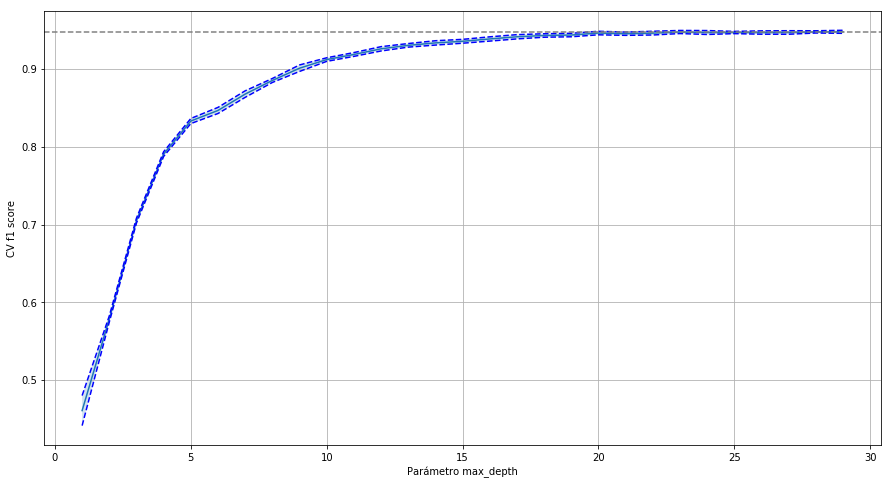

In [ ]:
parameter = "max_depth"
alphas = range(1,30)
tuned_parameters = [{parameter: alphas}]
n_folds = 5

clf = GridSearchCV(RandomForestClassifier(n_estimators=60), tuned_parameters, cv=n_folds, refit=False, n_jobs=-1, scoring="f1")
clf.fit(X_train, y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print(len(alphas))
print(len(scores))
plt.plot(alphas, scores)
std_error = scores_std / np.sqrt(n_folds)
plt.plot(alphas, scores + std_error, 'b--')
plt.plot(alphas, scores - std_error, 'b--')
std_error = scores_std / np.sqrt(n_folds)
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)
locs, labels = plt.yticks()
#plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
plt.axhline(np.max(scores), linestyle='--', color='.5')
plt.ylabel('CV f1 score')
plt.xlabel('Parámetro %s'%parameter)
plt.grid()
#plt.ylim(0, 1.1)
plt.show()

In [ ]:
def find_parameters(clf, parameter, alphas, alphas2=None):

    tuned_parameters = [{parameter: alphas}]
    n_folds = 5
    
    alph = None
    if alphas2==None: alph=alphas
    else: alph=alphas2

    clf = GridSearchCV(clf, tuned_parameters, cv=n_folds, refit=False, n_jobs=15, scoring="f1")
    clf.fit(X_train, y_train)
    scores = clf.cv_results_['mean_test_score']
    scores_std = clf.cv_results_['std_test_score']

    plt.plot(alph, scores)
    std_error = scores_std / np.sqrt(n_folds)
    plt.plot(alph, scores + std_error, 'b--')
    plt.plot(alph, scores - std_error, 'b--')
    std_error = scores_std / np.sqrt(n_folds)
    plt.fill_between(alph, scores + std_error, scores - std_error, alpha=0.2)
    locs, labels = plt.yticks()
    #plt.yticks(locs, list(map(lambda x: "%g" % x, locs)))
    plt.axhline(np.max(scores), linestyle='--', color='.5')
    plt.ylabel('CV f1 score')
    plt.xlabel('Parámetro %s'%parameter)
    plt.grid()
    #plt.ylim(0, 1.1)
    plt.show()

## DecisionTreeClassifier

### max_depth = 15

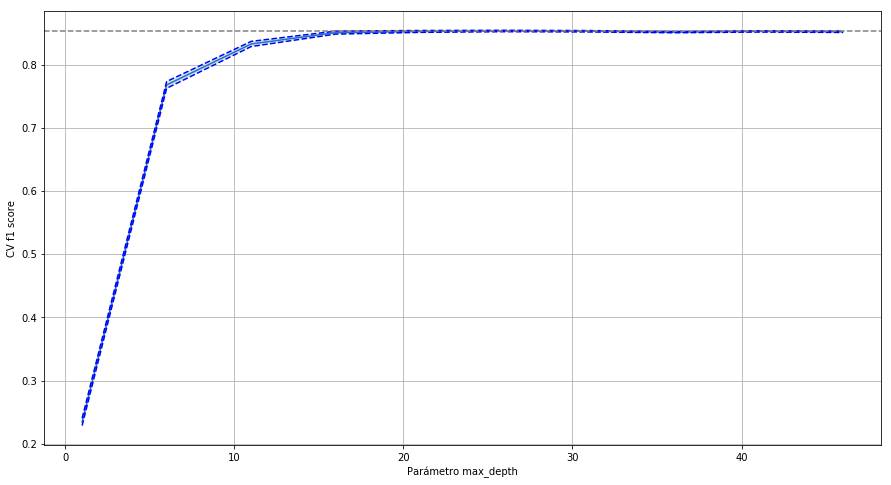

In [ ]:
find_parameters(DecisionTreeClassifier(), "max_depth", range(1,50,5))

## XGBoost

### n_estimators=4700

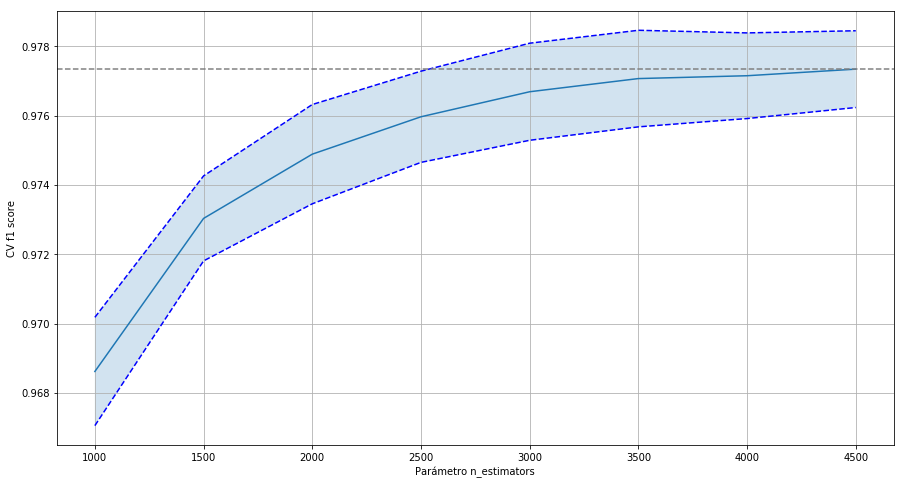

In [ ]:
find_parameters(XGBClassifier(), "n_estimators", range(1000,5000,500))

### learning_rate=0.6

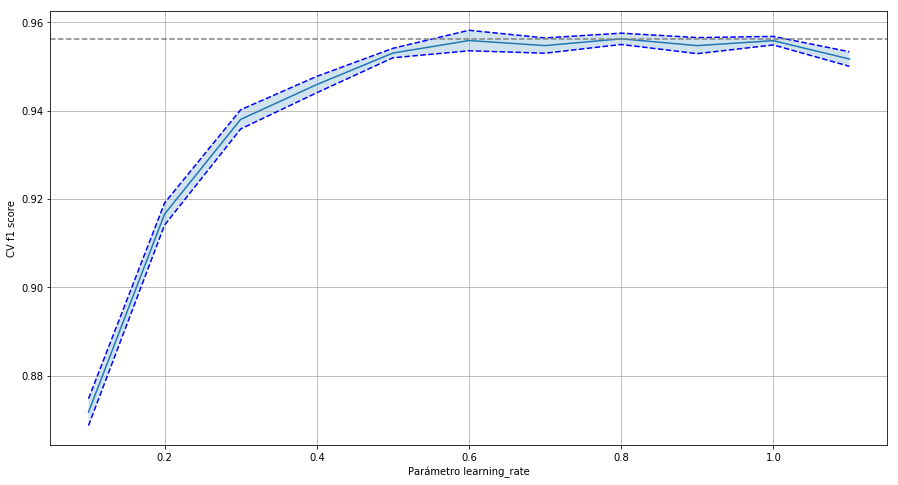

In [ ]:
find_parameters(XGBClassifier(), "learning_rate", np.arange(0.1,1.2,0.1))

### max_depth=10

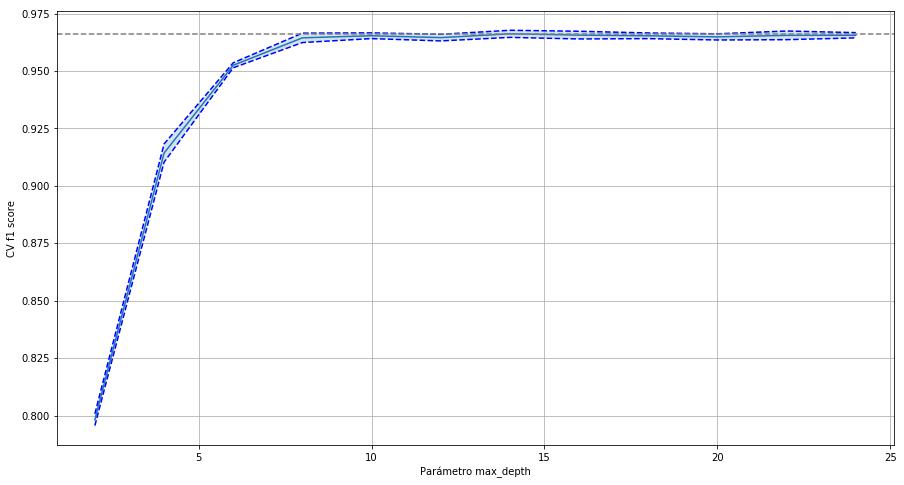

In [ ]:
find_parameters(XGBClassifier(), "max_depth", range(2,25,2))

##  LogisticRegression

### C=2

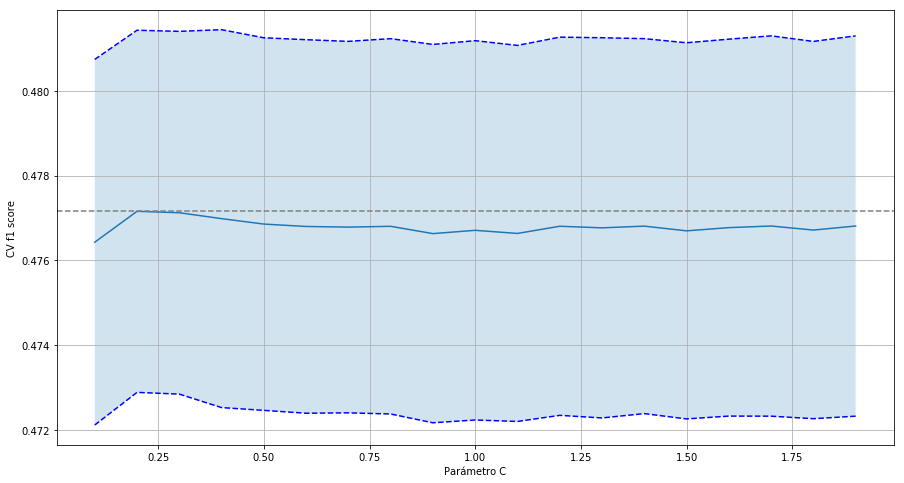

In [ ]:
find_parameters(LogisticRegression(), "C", np.arange(0.1,2,0.1))

## AdaBoostClassifier

### n_estimators=99

In [ ]:
#find_parameters(AdaBoostClassifier(), "n_estimators", range(98,200))

### learning_rate=0.6

In [ ]:
#find_parameters(AdaBoostClassifier(), "learning_rate", np.arange(0.01,1,0.02))

## KNeighborsClassifier

### n_neighbors=3

In [ ]:
find_parameters(KNeighborsClassifier(), "n_neighbors", range(2,16))

## MLPClassifier

### hidden_layer_sizes=18

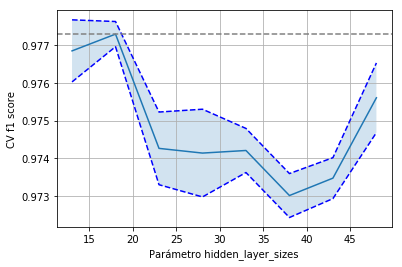

In [8]:
find_parameters(MLPClassifier(), "hidden_layer_sizes", [(x,) for x in range(13,50,5)], [x for x in range(13,50,5)])


### activation="logistic"

In [9]:
#find_parameters(MLPClassifier(random_state=5, hidden_layer_sizes=(26,)), "activation", ['identity', 'logistic', 'tanh', 'relu'])

### solver = "adam"

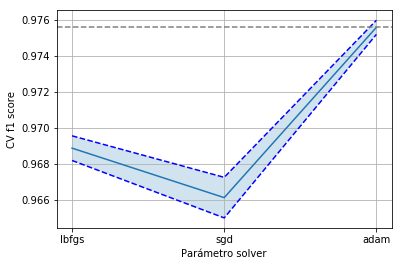

In [10]:
find_parameters(MLPClassifier(random_state=5, hidden_layer_sizes=(26,)), "solver", ['lbfgs', 'sgd', 'adam'])

In [11]:
help(clf5)

Help on LogisticRegression in module sklearn.linear_model.logistic object:

class LogisticRegression(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the cross-
 |  entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', 'sag' and 'lbfgs' solvers. It can handle
 |  both dense and sparse input. Use C-ordered arrays or CSR matrices
 |  containing 64-bit floats for optimal performance; any other input format
 |  will be converted (and copied).
 |  
 |  The 'newton-cg', 'sag', and 'lbfgs' solv

In [12]:
for x in range(1,20,2): print(x)

1
3
5
7
9
11
13
15
17
19
